In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/my-drive' 

Mounted at /content/gdrive


In [ ]:
import numpy as np
!apt install unzip
!unzip '/content/gdrive/My Drive/PairedEvents.zip'
!pip install requests


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Archive:  /content/gdrive/My Drive/PairedEvents.zip
   creating: PairedEvents/
   creating: PairedEvents/Image figure examples/
  inflating: PairedEvents/Image figure examples/Event1175gamma-rayNSB0_NSB2.png  
  inflating: PairedEvents/Image figure examples/Event1176gamma-rayNSB0_NSB2.png  
  inflating: PairedEvents/Image figure examples/Event1177gamma-rayNSB0_NSB2.png  
  inflating: PairedEvents/Image figure examples/Event1178gamma-rayNSB0_NSB2.png  
  inflating: PairedEvents/Image figure examples/Event1179gamma-rayNSB0_NSB2.png  
  inflating: PairedEvents/Image figure examples/Event1protonNSB0_NSB2.png  
  inflating: PairedEvents/Image figure examples/Event2protonNSB0_NSB2.png  
  inflating: PairedEvents/Image figure examples/Event3protonNSB0_NSB2.png  
  inflating: PairedEv

In [ ]:
!git clone https://github.com/cta-observatory/ctapipe.git /content/ctapipe

!pip install iminuit
!pip install eventio
%cd /content/ctapipe
!pwd
!ls
!pip -V
!python /content/ctapipe/setup.py install
from ctapipe.utils import get_dataset_path
from ctapipe.image.geometry_converter import convert_geometry_hex1d_to_rect2d, convert_geometry_rect2d_back_to_hexe1d
from ctapipe.visualization import CameraDisplay
from ctapipe.io import event_source
import copy
import matplotlib.pyplot as plt

Cloning into '/content/ctapipe'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 24561 (delta 11), reused 7 (delta 4), pack-reused 24540
Receiving objects: 100% (24561/24561), 61.22 MiB | 35.62 MiB/s, done.
Resolving deltas: 100% (17657/17657), done.
     |████████████████████████████████| 327kB 19.8MB/s 
     |████████████████████████████████| 40kB 6.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for eventio: filename=eventio-1.5.1.post1-cp37-cp37m-linux_x86_64.whl size=881710 sha256=6d93fe111a5575d2931231b7b0986324fdb6c9671b49c80da5452b411ef344bb
  Stored in directory: /root/

ImportError: ignored

<Figure size 432x288 with 0 Axes>

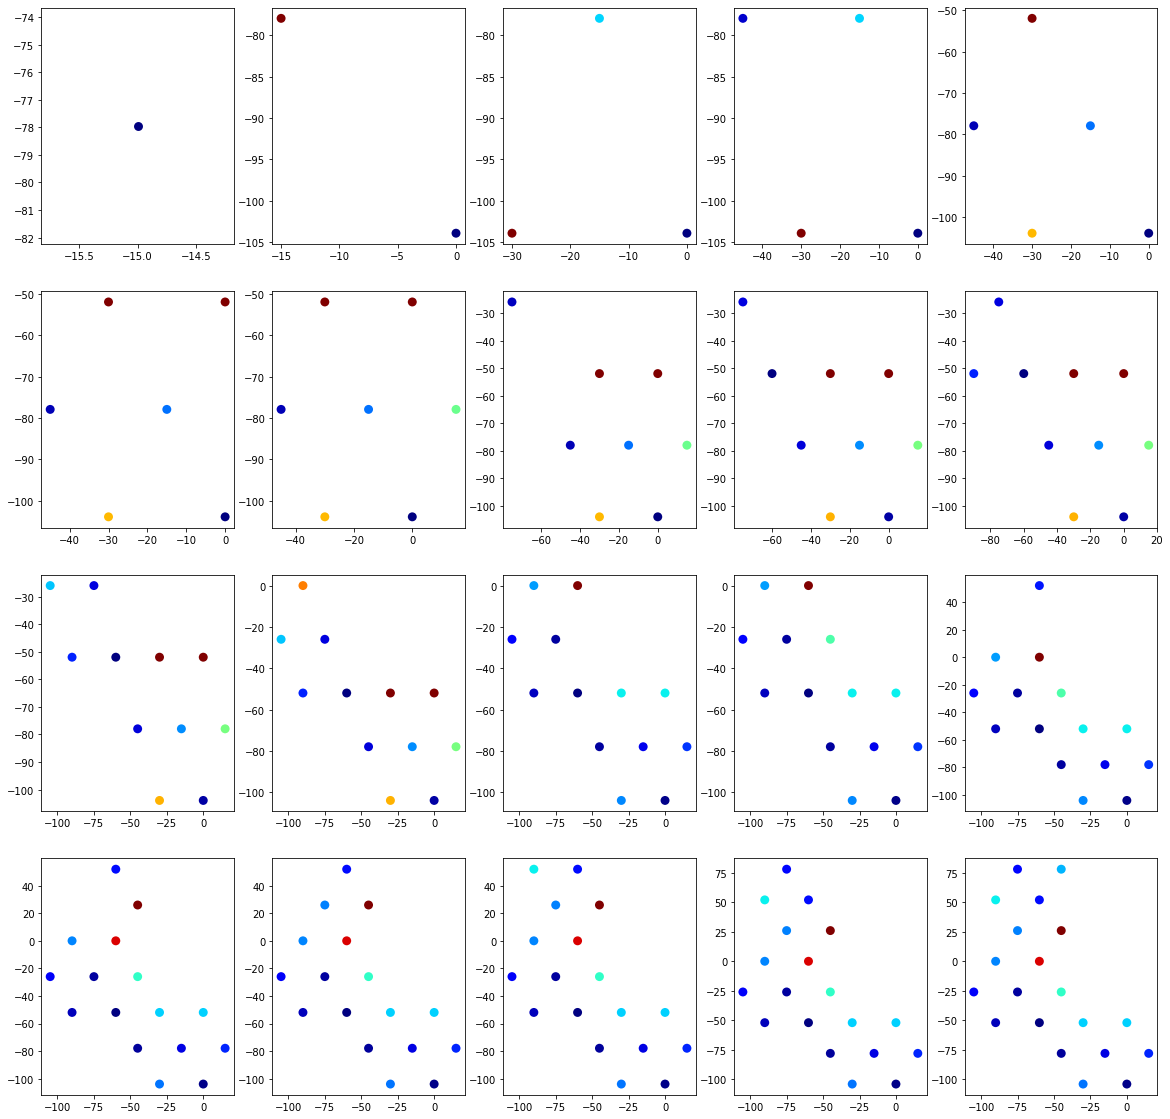

In [ ]:
import numpy as np
import  matplotlib.pyplot as plt
n=1

x_axis=np.genfromtxt('/content/gdrive/My Drive/X_AXIS.txt', dtype=np.float32, delimiter='	')
y_axis=np.genfromtxt('/content/gdrive/My Drive/Y_AXIS.txt', dtype=np.float32, delimiter='	')
Z = np.genfromtxt('PairedEvents/ev1-2482-NSB2-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t', skip_footer = 482 )
Z = np.delete(Z, 0, axis=1)

x_1 = x_axis #[:n]
y_1 = y_axis #[:n]
z_1 = Z[0]   #[:n]
#X,Y = np.meshgrid(x_axis,y_axis)
#plt.imshow(z, interpolation='nearest', cmap=plt.cm.viridis, extent=[-2,2,2,2])
#plt.show()
plt.figure()
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20,20))
for row in ax:
    for col in row:
        col.scatter(x_1[:n], y_1[:n], c=z_1[:n],cmap="jet", s=80, lw=0)
        n=n+1

#points1 = ax[0,0].scatter(x_1[:n], y_1[:n], c=z_1[:n],cmap="jet", lw=0)
#points2 = ax[0,1].scatter(x_1[:n+1], y_1[:n+1], c=z_1[:n+1],cmap="jet", lw=0)
#points3 = ax[1,0].scatter(x_1[:n+2], y_1[:n+2], c=z_1[:n+2],cmap="jet", lw=0)
#points4 = ax[1,1].scatter(x_1[:n+3], y_1[:n+3], c=z_1[:n+3],cmap="jet", lw=0)

#plt.colorbar(points1)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def hex_to_rect (x_axis, y_axis, event_sorted):
  ind_1 = np.lexsort((event_sorted, x_axis, y_axis))
  y_axis_1 = [None]*560
  p = 0
  for i in ind_1: 
     y_axis_1 [p] = y_axis[i] 
     p = p + 1

  sk = 1
  b = [None]*31
  b[0] = y_axis_1[0]
  for i in range (560):
      if b[sk-1]!=y_axis_1[i]:
         b[sk] = y_axis_1[i]
         sk +=1
  y_axis_1 = []
  for z in range (30):
    y_axis_1 = np.insert(y_axis_1, obj = [z*30]*30, values = b[z] )

  a = np.empty((30,30), dtype = np.float32)
  x_min = -675

  for j in range (30):
     for i in range (30):
        a[j][i] = x_min + i*30 
  x_min+=15

  x_axis_1 = a.flatten()

  exam = np.zeros((900), dtype = np.float64)
  exam = np.insert(event_sorted, values = [0]*22, obj = 0 ) 
  exam = np.insert(exam, values = [0]*6, obj = 24) 
  exam = np.insert(exam, values = [0]*17, obj = 30)# 
  exam = np.insert(exam, values = [0]*4, obj = 56) #
  exam = np.insert(exam,values = [0]*16, obj = 60) #
  exam = np.insert(exam, values = [0]*2, obj = 88) #
  exam = np.insert(exam, values = [0]*16, obj = 90) #
  exam = np.insert(exam, values = [0]*16, obj = 120)#
  exam = np.insert(exam, values = [0]*15, obj = 150) #
  exam = np.insert(exam, values = [0], obj = 179) #
  exam = np.insert(exam, values = [0]*13, obj = 180) #
  exam = np.insert(exam, values = [0], obj = 209) #
  exam = np.insert(exam, values = [0]*8, obj = 210)#
  exam = np.insert(exam, values = [0]*2, obj = 220)#
  exam = np.insert(exam, values = [0], obj = 239)#
  exam = np.insert(exam, values = [0]*7, obj = 240)#
  exam = np.insert(exam, values = [0]*2, obj = 268)#
  exam = np.insert(exam, values = [0]*7, obj = 270)#
  exam = np.insert(exam, values = [0]*2, obj = 298)#
  exam = np.insert(exam, values = [0]*7, obj = 300) #
  exam = np.insert(exam, values = [0]*6, obj = 330)#
  exam = np.insert(exam, values = [0]*4, obj = 360)#
  exam = np.insert(exam, values = [0], obj = 389) #
  exam = np.insert(exam, values = [0]*3, obj = 390)#
  exam = np.insert(exam, values = [0], obj = 419)#
  exam = np.insert(exam, values = [0]*3, obj = 420)#
  exam = np.insert(exam, values = [0], obj = 449)#
  exam = np.insert(exam, values = [0]*3, obj = 450)#
  exam = np.insert(exam, values = [0]*2, obj = 478)#
  exam = np.insert(exam, values = [0]*2, obj = 480)#
  exam = np.insert(exam, values = [0]*4, obj = 506)#
  exam = np.insert(exam, values = [0]*2, obj = 510)#
  exam = np.insert(exam, values = [0]*5, obj = 535)#
  exam = np.insert(exam, values = [0]*2, obj = 540)#
  exam = np.insert(exam, values = [0]*5, obj = 565) #
  exam = np.insert(exam, values = [0], obj = 570) #
  exam = np.insert(exam, values = [0]*5, obj = 595)#
  exam = np.insert(exam, values = [0], obj = 600)#
  exam = np.insert(exam, values = [0]*6, obj = 624)#
  exam = np.insert(exam, values = [0], obj = 630)#
  exam = np.insert(exam, values = [0]*6, obj = 654)#
  exam = np.insert(exam, values = [0]*6, obj = 684)#
  exam = np.insert(exam, values = [0]*7, obj = 713)#
  exam = np.insert(exam, values = [0]*2, obj = 720)#
  exam = np.insert(exam, values = [0]*9, obj = 741)#
  exam = np.insert(exam, values = [0]*4, obj = 750)#
  exam = np.insert(exam, values = [0]*10, obj = 770)#
  exam = np.insert(exam, values = [0]*4, obj = 780)#
  exam = np.insert(exam, values = [0]*12, obj = 798)#
  exam = np.insert(exam, values = [0]*3, obj = 810) #
  exam = np.insert(exam, values = [0]*13, obj = 827)#
  exam = np.insert(exam, values = [0]*3, obj = 840) #
  exam = np.insert(exam, values = [0]*15, obj = 855) #
  exam = np.insert(exam, values = [0]*5, obj = 870) #
  exam = np.insert(exam, values = [0]*2, obj = 880)#
  exam = np.insert(exam, values = [0]*16, obj = 884) #

  fin = np.reshape(exam, (30,30))
  return fin

def back_to_hex (rec_event):
   tem = rec_event.flatten()
   tem = np.delete(tem, np.s_[884:900]) 
   tem = np.delete(tem, np.s_[880:882]) 
   tem = np.delete(tem, np.s_[870:875]) 
   
   tem = np.delete(tem, np.s_[855:870])
   tem = np.delete(tem, np.s_[840:843])
   
   tem = np.delete(tem, np.s_[827:840])  
   tem = np.delete(tem, np.s_[810:813]) 
   
   tem = np.delete(tem, np.s_[798:810]) 
   tem = np.delete(tem, np.s_[780:784]) 
   
   tem = np.delete(tem, np.s_[770:780])
   tem = np.delete(tem, np.s_[750:754])  
   
   tem = np.delete(tem, np.s_[741:750]) 
   tem = np.delete(tem, np.s_[720:722]) 
   tem = np.delete(tem,np.s_[713:720]) 
   
   tem = np.delete(tem, np.s_[684:690])
    
   tem = np.delete(tem, np.s_[654:660]) 
   tem = np.delete(tem, 630) 
   
   tem = np.delete(tem, np.s_[624:630]) 
   tem = np.delete(tem, 600)
   
   tem = np.delete(tem, np.s_[595:600])  
   tem = np.delete(tem, 570)
   
   tem = np.delete(tem, np.s_[565:570])
   tem = np.delete(tem, np.s_[540:542])
   
   tem = np.delete(tem, np.s_[535:540])
   tem = np.delete(tem, np.s_[510:512])
   
   tem = np.delete(tem, np.s_[506:510])
   tem = np.delete(tem, np.s_[480:482])
   
   tem = np.delete(tem, np.s_[478:480])
   tem = np.delete(tem, np.s_[450:453])
   
   tem = np.delete(tem, 449)
   tem = np.delete(tem, np.s_[420:423])
   
   tem = np.delete(tem, 419)
   tem = np.delete(tem, np.s_[390:393])
  
   tem = np.delete(tem, 389)
   tem = np.delete(tem, np.s_[360:364])
   tem = np.delete(tem, np.s_[330:336])
   tem = np.delete(tem, np.s_[300:307])
   tem = np.delete(tem, np.s_[298:300])
   tem = np.delete(tem, np.s_[270:277])
   tem = np.delete(tem, np.s_[268:270])
   tem = np.delete(tem, np.s_[240:247])
   tem = np.delete(tem, 239)
   tem = np.delete(tem, np.s_[220:222])
   tem = np.delete(tem, np.s_[210:218])
   tem = np.delete(tem, 209)
   tem = np.delete(tem, np.s_[180:193])
   tem = np.delete(tem, 179)
   tem = np.delete(tem, np.s_[150:165])
   tem = np.delete(tem, np.s_[120:136])
   tem = np.delete(tem, np.s_[90:106])
   tem = np.delete(tem, np.s_[88:90])
   tem = np.delete(tem, np.s_[60:76])
   tem = np.delete(tem, np.s_[56:60])
   tem = np.delete(tem, np.s_[30:47])
   tem = np.delete(tem, np.s_[24:30])
   tem = np.delete(tem, np.s_[0:22])
   fin = np.reshape(tem, 560)
   return fin

here we go
-390.0
да ты послушай
been there done that
(900,)
(900,)
(24000, 560)
(24000, 30, 30, 1)
still got it


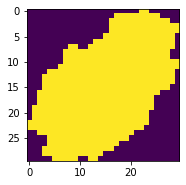

In [ ]:
import os
import cv2
import h5py
import pandas as pd
from PIL import Image
from sklearn.preprocessing import normalize
import numpy as np

foot_n = 5456 #сколько выделяем на тестовую подборку
head_n = 24000 #сколько выделяем на тренинговую подборку


n = 35
k = 560//n

print ('here we go')


x_axis=np.genfromtxt('/content/gdrive/My Drive/X_AXIS.txt', dtype=np.float32, delimiter='	')
y_axis=np.genfromtxt('/content/gdrive/My Drive/Y_AXIS.txt', dtype=np.float32, delimiter='	')



print(min(x_axis))

x_df = np.genfromtxt('/content/gdrive/My Drive/ev1-29456-NSB2-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t', skip_footer = foot_n )
y_df = np.genfromtxt('/content/gdrive/My Drive/ev1-29456-NSB0-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t', skip_footer = foot_n)
x_t = np.genfromtxt('/content/gdrive/My Drive/ev1-29456-NSB2-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t', skip_header = head_n, max_rows= foot_n )
y_t = np.genfromtxt('/content/gdrive/My Drive/ev1-29456-NSB0-trigger2x7-no-cleaning-paired.txt', dtype=np.float32, delimiter='\t',skip_header = head_n, max_rows= foot_n)



print ('да ты послушай')


x_df = np.delete(x_df, 0, axis=1)
y_df = np.delete(y_df, 0, axis=1)

x_t = np.delete(x_t, 0, axis=1)
y_t = np.delete(y_t, 0, axis=1)
print ('been there done that')

ind_1 = np.lexsort((x_df[0], x_axis, y_axis))

y_axis_1 = [None]*560
p =  0
for i in ind_1: #ind_1
     y_axis_1 [p] = y_axis[i] #y_axis
     p = p + 1
     
y_axis_b = [None]*560
y_axis_b = y_axis_1

sk = 1
b = [None]*31
b[0] = y_axis_1[0]
for i in range (560):
      if b[sk-1]!=y_axis_1[i]:
         b[sk] = y_axis_1[i]
         sk +=1
y_axis_1 = []

for z in range (30):
    y_axis_1 = np.insert(y_axis_1, obj = [z*30]*30, values = b[z] ) #не изменяются

x_min = -675
a = np.empty((30,30), dtype = np.float32)

for j in range (30):
     for i in range (30):
        a[j][i] = x_min + i*30 
     x_min+=15

x_axis_1 = a.flatten()
q = 0
x_axis_b = [None]*560
for i in ind_1:
  x_axis_b [q] = x_axis [i]
  q = q + 1 
  
print ((x_axis_1.shape))
print ((y_axis_1.shape))
x_df_sort = np.empty((head_n,560), dtype = np.float64) #fix dimensions
y_df_sort = np.empty((head_n,560), dtype = np.float64)
x_t_sort = np.empty((foot_n,560), dtype = np.float64) 
y_t_sort = np.empty((foot_n,560), dtype = np.float64)

print(y_df_sort.shape)

i = 0
for i in range(head_n):
  k = 0
  for j in ind_1:
    x_df_sort[i][k] = x_df[i][j] 
    y_df_sort[i][k] = y_df[i][j]
    k  = k + 1

for i in range(foot_n):
  k=0
  for j in ind_1:
    x_t_sort[i][k] = x_t[i][j] 
    y_t_sort[i][k] = y_t[i][j]
    k = k + 1


x_df_sort = normalize(x_df_sort, norm = 'max', axis=0)
y_df_sort = normalize(y_df_sort, norm = 'max', axis=0)
x_t_sort = normalize(x_t_sort, norm = 'max', axis=0)
y_t_sort = normalize(y_t_sort, norm = 'max', axis=0)

x_train_rect =  np.empty((head_n, 30, 30), dtype = np.float64) #fix dimensions
y_train_rect = np.empty((head_n,30, 30), dtype = np.float64)

x_t_rect = np.empty((foot_n,30, 30), dtype = np.float64) 
y_t_rect = np.empty((foot_n, 30, 30), dtype = np.float64)
for i in range (head_n):
  x_train_rect [i] = hex_to_rect(x_axis, y_axis, x_df_sort[i])
  y_train_rect [i] = hex_to_rect(x_axis, y_axis, y_df_sort[i])
for i in range (foot_n):
  x_t_rect [i] = hex_to_rect(x_axis, y_axis, x_t_sort[i])
  y_t_rect [i] = hex_to_rect(x_axis, y_axis, y_t_sort[i])
x_train = np.reshape(x_train_rect, (head_n, 30, 30, 1))
y_train = np.reshape(y_train_rect, (head_n, 30, 30, 1))
x_test =  np.reshape(x_t_rect, (foot_n, 30, 30, 1))
y_test = np.reshape(y_t_rect, (foot_n, 30, 30, 1))

print(x_train.shape) 
x_train_pic = np.reshape (x_train_rect, (head_n, 30, 30))
y_train_pic = np.reshape(y_train_rect, (head_n, 30, 30))
x_test_pic =  np.reshape(x_t_rect, (foot_n, 30, 30))
y_test_pic = np.reshape(y_t_rect, (foot_n, 30, 30))

mask = [100]*560
mask_rec = np.empty((30,30), dtype = np.float64)
mask_rec = hex_to_rect(x_axis, y_axis, mask)
print ('still got it')
sup = [None]*560
sup = back_to_hex(x_train[0])

plt.figure()
#plt.scatter (x_axis_b, y_axis_b, c = x_t_sort[425], s = 90, marker = "o")
plt.subplot(1, 2, 1)
plt.imshow(mask_rec)
#plt.subplot(1,2,2)
#plt.imshow(x_test_pic[96])
plt.show()

<class 'numpy.float32'>


[-435. -405. -375. -345. -315. -285. -255. -225. -195. -165. -135. -105.
  -75.  -45.  -15.   15.   45.   75.  105.  135.  165.  195. -450. -420.
 -390. -360. -330. -300. -270. -240. -210. -180. -150. -120.  -90.  -60.
  -30.    0.   30.   60.   90.  120.  150.  180.  210. -435. -405. -375.
 -345. -315. -285. -255. -225. -195. -165. -135. -105.  -75.  -45.  -15.
   15.   45.   75.  105.  135.  165.  195.  225. -450. -420. -390. -360.
 -330. -300. -270. -240. -210. -180. -150. -120.  -90.  -60.  -30.    0.
   30.   60.   90.  120.  150.  180.  210.  240. -435. -405. -375. -345.
 -315. -285. -255. -225. -195. -165. -135. -105.  -75.  -45.  -15.   15.
   45.   75.  105.  135.  165.  195.  225.  255. -450. -420. -390. -360.
 -330. -300. -270. -240. -210. -180. -150. -120.  -90.  -60.  -30.    0.
   30.   60.   90.  120.  150.  180.  210.  240.  270. -435. -405. -375.
 -345. -315. -285. -255. -225. -195. -165. -135. -105.  -75.  -45.  -15.
   15.   45.   75.  105. 

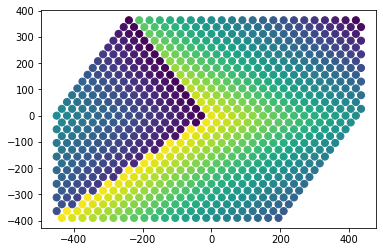

In [ ]:
ind_1 = np.lexsort((x_df[0], x_axis, y_axis))

y_axis_1 = [None]*560
p =  0
for i in ind_1: #ind_1
     y_axis_1 [p] = y_axis[i] #y_axis
     p = p + 1
     
y_axis_b = [None]*560
y_axis_b = y_axis_1

sk = 1
b = [None]*31
b[0] = y_axis_1[0]
for i in range (560):
      if b[sk-1]!=y_axis_1[i]:
         b[sk] = y_axis_1[i]
         sk +=1
y_axis_1 = []

for z in range (30):
    y_axis_1 = np.insert(y_axis_1, obj = [z*30]*30, values = b[z] ) #не изменяются

x_min = -675
a = np.empty((30,30), dtype = np.float32)

for j in range (30):
     for i in range (30):
        a[j][i] = x_min + i*30 
     x_min+=15

x_axis_1 = a.flatten()
print(type(x_axis_1[i]))

def rect_to_purehex (x_axis_s, y_axis_s, event_rect):
  tem = event_rect.flatten()
  x_left_edge = -450
  x_right_edge = 435
  x_axis_return = np.array([])
  y_axis_return = np.array([])
  for i in reversed(range(900)):
    if (int(x_axis_s[i]) < x_left_edge):
      tem = np.delete(tem, np.s_[i])
    elif (int(x_axis_s[i]) > x_right_edge):
      tem = np.delete(tem, np.s_[i])
    else:
      tem[i] = x_axis_s[i]
      x_axis_return = np.append(x_axis_return, x_axis_s[i])
      y_axis_return = np.append(y_axis_return, y_axis_s[i])
      #print('center', i, end = ' ')
     # if (int(x_axis_1[i])==x_left_edge):
     #   print ('\n left edge', i, x_axis_1[i])
     # elif (x_axis_1[i]==x_right_edge):
       # print ('\n right edge', i)
      #else:
       # print('center', i, x_axis_1[i], end = ' ')
      #  if (int(x_axis_1[i]) < -450):
       #  print ('\n ERROR', i, x_axis_1[i])
      

  return tem, x_axis_return, y_axis_return

x_axis_n = np.array([])
template = np.ones(900)
tem_h, x_axis_new, y_axis_new = rect_to_purehex(x_axis_1, y_axis_1, template)  
print ('\n')
print (tem_h)
print (tem_h.shape)
print (x_axis_new.shape)
plt.scatter(x_axis_new, y_axis_new, c = tem_h, s = 50, marker = 'o')
for i in range(900):

<Figure size 432x288 with 0 Axes>

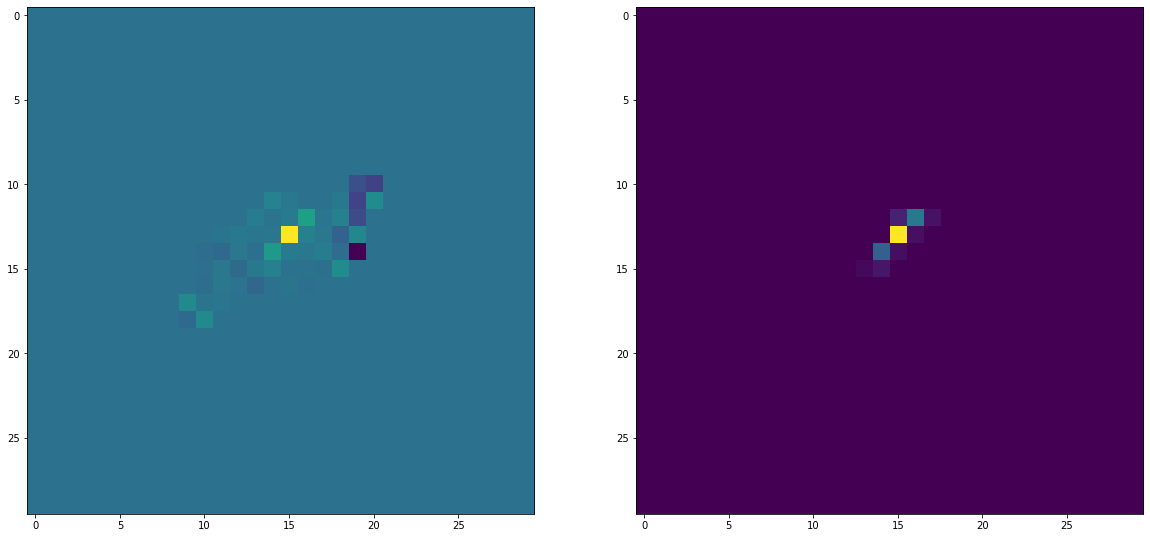

In [ ]:
x_transp =  np.empty((2000, 30, 30), dtype = np.float64) 
y_transp = np.empty((2000,30, 30), dtype = np.float64)  
for i in range (2000):
  x_transp [i]  =  np.transpose(x_train_rect[i])
  y_transp [i] = np.transpose(y_train_rect[i])
x_train_tr = np.reshape(x_transp, (2000, 30, 30, 1))
y_train_tr = np.reshape(y_transp, (2000, 30, 30, 1))

plt.figure()
fig, (ax1, ax2) = plt.subplots(figsize = (20,20), ncols = 2)

beg = ax1.imshow(x_test_pic[0])
res = ax2.imshow(y_test_pic[0])

plt.show()



In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

print(np.sum(x_train[0]))
plt.figure()
fig, (ax1, ax2) = plt.subplots(figsize = (20,20), ncols = 2)

iii = ax1.imshow(x_test_pic[0]/np.sum(x_test_pic[0]))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(iii, cax=cax, orientation='vertical')
uuu = ax2.imshow(x_test_pic[0])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(uuu, cax=cax, orientation='vertical');

plt.show()

norm_x_tr = np.empty(head_n)
norm_y_tr = np.empty(head_n)
for i in range (head_n):
  norm_x_tr[i] = np.sum(x_train[i])
  norm_y_tr[i] = np.sum(y_train[i])
  x_train[i] = x_train/np.sum(x_train[i])
  y_train[i] = y_train/np.sum(y_train)



SyntaxError: ignored

In [ ]:
E_train = np.genfromtxt('/content/gdrive/My Drive/pr1-29456-NSB2-trigger2x7-no-cleaning-paired.txt', dtype='U', delimiter='\t')
E_train_1 = np.reshape (E_train, (29456, 14))
print(E_train_1.shape)
print(E_train_1[0])
E_tr = E_train_1[0:head_n, [1, 2]]
E_tst = E_train_1[0:foot_n, [1,2]]

print(E_tr.shape)

for i in range (head_n):
  E_tr[i][0]=E_tr[i][0].strip('part=')
  E_tr[i][1]=E_tr[i][1].strip('E[TeV]=')
for i in range (foot_n):
  E_tst[i][0]=E_tst[i][0].strip('part=')
  E_tst[i][1]=E_tst[i][1].strip('E[TeV]=')
print(type(E_tr[0][1]))
E_tr = E_tr.astype(np.float)
E_tst = E_tst.astype(np.float)
print(type(E_tr[0][1])) 
print ( E_tr[:,1])


(29456, 14)
['[1]' 'part=14' 'E[TeV]=4.805563'
 'R[m]=227.090576 (shower core: 0.000000, 0.000000; telescope position: 188.064453, 127.286650)'
 'Theta[deg]=36.115412' 'Phi[deg]=-6.462735' 'nnShower=118246'
 'nnScatter=0' 'Pixel number=28' 'Image size[photoelectrons]=5.418690e+01'
 'Min.amplitude after pedestal removal[photoelectrons]=-3.383169'
 'Max.amplitude after pedestal removal[photoelectrons]=19.773976'
 'SimulFileName=bpe411_30_da5.0_md5noDAQ_th26_44_dead160_hold48_NSB2per35allcam_trg2x7topolR_dt2.5ns.mat'
 'MirrMisalign=5']
(24000, 2)
<class 'numpy.str_'>
<class 'numpy.float64'>
[4.805563 4.805563 4.805563 ... 2.571456 1.784169 1.784169]


Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_261 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_262 (Conv2D)          (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_263 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_transpose_255 (Conv2D (None, 26, 26, 32)        18464     
_________________________________________________________________
conv2d_transpose_256 (Conv2D (None, 28, 28, 16)        4624      
_________________________________________________________________
conv2d_transpose_257 (Conv2D (None, 30, 30, 1)         145       
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________

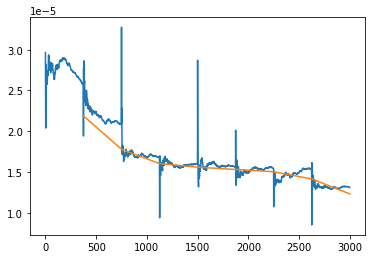

171/171 - 0s - loss: 2.0907e-04 - accuracy: 0.9563
loss:  0.00020906921417918056   accuracy:  0.9562554955482483


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, activations
from tensorflow.keras import callbacks
from sklearn.metrics import mean_squared_error

#loss_tracker = keras.metrics.(name="loss")


def loss_real (x):
  def loss_0(y_true,y_pred):
    loss = mean_squared_error(x - y_pred, y_true)
    print (loss.shape)
    return loss 
  return loss_0

class LossHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.history = {'loss':[],'val_loss':[], 'exp_loss':[]}
        
    def on_batch_end(self, batch, logs={}):
        self.history['loss'].append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs={}):
        self.history['val_loss'].append(logs.get('val_loss'))
       # self.history['exp_loss'].append(self.model.evaluate(x_test, y_test, verbose=1))


#нейронная сеть
class denoiser:
  def __init__(self, model=0):
    self.width = 0
    self.height = 0
    self.depth = 0
    padding = 1
    kernel_size = 3
    self.model = 0
  #преобразовать в чб (если надо)
  def create (self, height, width, depth, channels = 1):
    self.model = models.Sequential() #batch_size, channels, rows, cols
    self.model.add(layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(height, width, depth))) #проверить что тут входные значения 
    #self.model.add(layers.MaxPooling2D((2, 2)))
    self.model.add(layers.Conv2D(32, (3,3), activation =  'relu')) 
    #self.model.add(layers.MaxPooling2D((2, 2)))
    self.model.add(layers.Conv2D(64, (3,3), activation =  'relu'))
    self.model.add(layers.Conv2DTranspose(32, (3,3), activation = 'relu'))
    #self.model.add(layers.UpSampling2D((2,2), data_format = 'channels_last')) #используются
    self.model.add(layers.Conv2DTranspose(16, (3,3), activation = 'relu'))
    #self.model.add(layers.UpSampling2D((2,2), data_format = 'channels_last'))
    self.model.add(layers.Conv2DTranspose(1, (3,3), activation = 'relu' ))
    
    self.model.summary()
  def train (self, train_noise, train_orig, ep):
    history = LossHistory()
    self.model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
    self.model.fit(train_noise, train_orig, batch_size = 64, epochs=ep, callbacks = [history], validation_data=(train_noise,  train_orig))
   # print (history.history['exp_loss'][3][0])
    y1=history.history['loss']
    y2=history.history['val_loss']
   # y_3=np.array(history.history['exp_loss'])
   # y3 = []
   # for i in range (ep):
    #  y3.append( y_3[i][0])
    x1 = np.arange( len(y1))
    k=len(y1)/len(y2)
    x2 = np.arange(k,len(y1)+1,k)
    fig, ax = plt.subplots()
    line1, = ax.plot(x1, y1, label='loss')
    line2, = ax.plot(x2, y2, label='val_loss')
    plt.show()
   # x3=[]
  #  for i in range(ep):
  #    x3.append(i)
  #  plt.plot(x3, y3)
  #  plt.show()

  
     #self.make(train_noise) вместо train_noise
  def evaluate (self, test_noise,test_orig):
    test_loss, test_acc = self.model.evaluate(test_noise, test_orig, verbose=2) #self.make(test_noise) вместо test_noise
    print ('loss: ', test_loss, ' ', 'accuracy: ', test_acc)

  
  def make (self, pic_x):
    pred = self.model.predict(pic_x)
    return pred
  #def use (x):

a = denoiser ()
a.create (height = 30, width = 30, depth = 1)

print ('yay')
a.train(x_train, x_train - y_train, ep = 8)
#a.train(y_train, y_train, ep = 2)
#a.train(x_train_tr, y_train_tr, ep = 1)

a.evaluate (x_test, x_test - y_test)
#вставка: графики результатов


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, activations

#max_pool?
class det_energy:
    def __init__(self, model=0):
      self.width = 0
      self.height = 0
      self.depth = 0
      padding = 1
      kernel_size = 3
      self.model = 0
    def create (self, height, width, depth, channels = 1):
      self.model = models.Sequential() #batch_size, channels, rows, cols
      self.model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(height, width, depth))) 
      self.model.add(layers.MaxPooling2D((2, 2))) 
      self.model.add(layers.Conv2D(64, (3,3), activation =  'relu')) 
      self.model.add(layers.MaxPooling2D((2, 2)))
      self.model.add(layers.Conv2D(64, (3,3), activation =  'relu'))
      self.model.add(layers.Flatten())
      self.model.add(layers.Dense(64, activation='tanh')) #SIGMOID ЗДЕСЬ
      self.model.add(layers.Dense(1))
      self.model.summary()
    def train (self, train_noise, train_E, ep):
      self.model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsoluteError(), metrics=['accuracy'])
      history = self.model.fit(train_noise, train_E, epochs=ep, validation_data=(train_noise, train_E))
      plt.plot(history.history['loss'], label='loss')
      plt.plot(history.history['val_loss'], label = 'val_loss')
      plt.xlabel('Epoch')
      plt.ylabel('loss')
      plt.legend(loc='upper right')
    def make (self, pic_x):
      pred = self.model.predict_step(pic_x)
      return pred
    def evaluate (self, test_pic, E_test):
     test_loss, test_acc = self.model.evaluate(test_pic,  E_test, verbose=2) #self.make(test_noise) вместо test_noise
     print ('loss: ', test_loss, ' ', 'accuracy: ', test_acc)

E =det_energy()
E.create (height = 30, width = 30, depth = 1)
print(y_train.shape)

E.train(y_train, E_tr[:,1], ep = 12)

y=x_train_p = np.reshape(y_train[0], (1, 30, 30, 1))

E.evaluate (y_test, E_tst[:,1])
predd = E.make(y_train_p)
print(predd)
print(E_tr[0])

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_183 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)              

KeyboardInterrupt: ignored

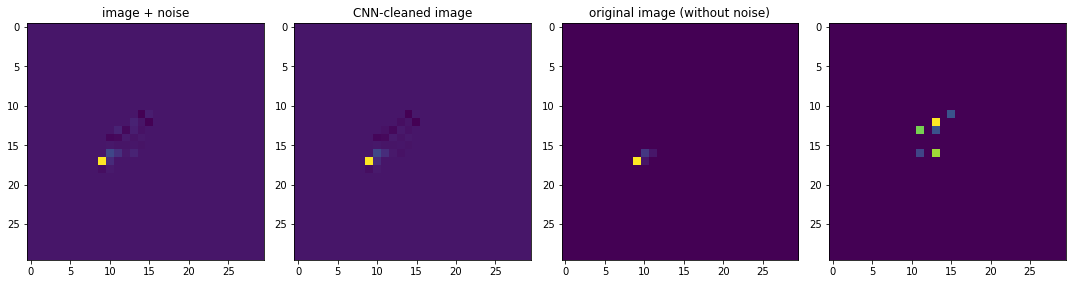

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
num = 200
#pic=np.genfromtxt('/content/gdrive/My Drive/example_noise.txt', dtype=np.float32, delimiter='\t')
#pic = (np.expand_dims(pic,0))
pic_nn = np.reshape(x_test_pic[num], (1, 30, 30, 1))
pic_nn_y = np.reshape(y_test_pic[num], (1, 30, 30, 1))
#pic_show = np.reshape(pic, (1, 30, 30))

pic_pred = a.make(pic_nn - pic_nn_y)
pic_pred_show = np.reshape(pic_pred,(30, 30))



fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (15,15), ncols = 4)

beg = ax1.imshow(x_test_pic[num])
ax1.set_title('image + noise')
#ax1.grid (True)
#ax1.grid(which='major',
        #color = 'k', 
       # linewidth = 2)
#ax1.minorticks_on()
#ax1.grid(which='minor', 
     #   color = 'k', 
      #  linestyle = ':', linewidth = 2)


res = ax2.imshow(x_test_pic[num] - pic_pred_show)
ax2.set_title('CNN-cleaned image')
#ax2.grid(which='major',
  #      color = 'k', 
  #      linewidth = 1)
#ax2.minorticks_on()
#ax2.grid(which='minor', 
  #      color = 'k', 
   #     linestyle = ':', linewidth = 2)
expec = ax3.imshow(y_test_pic[num])
ax3.set_title('original image (without noise)')

werk = ax4.imshow(pic_pred_show)

plt.tight_layout(h_pad=1)
#plt.colorbar(beg, ax=ax1)

plt.show()

In [ ]:
import math
num = 22
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
for row in ax:
  axs[row, 0].plot(x, y1, '-')
  axs[row, 1].plot(x, y2, '--')
  axs[row, 2].plot(x, y3, '-.')
  axs[row, 3].plot(x, y4, ':')
  num=num+1

1.0
-2.0303756175676893
(30, 30)
(30, 30)
snr 14.560786374040045
snr 14.563337285794798


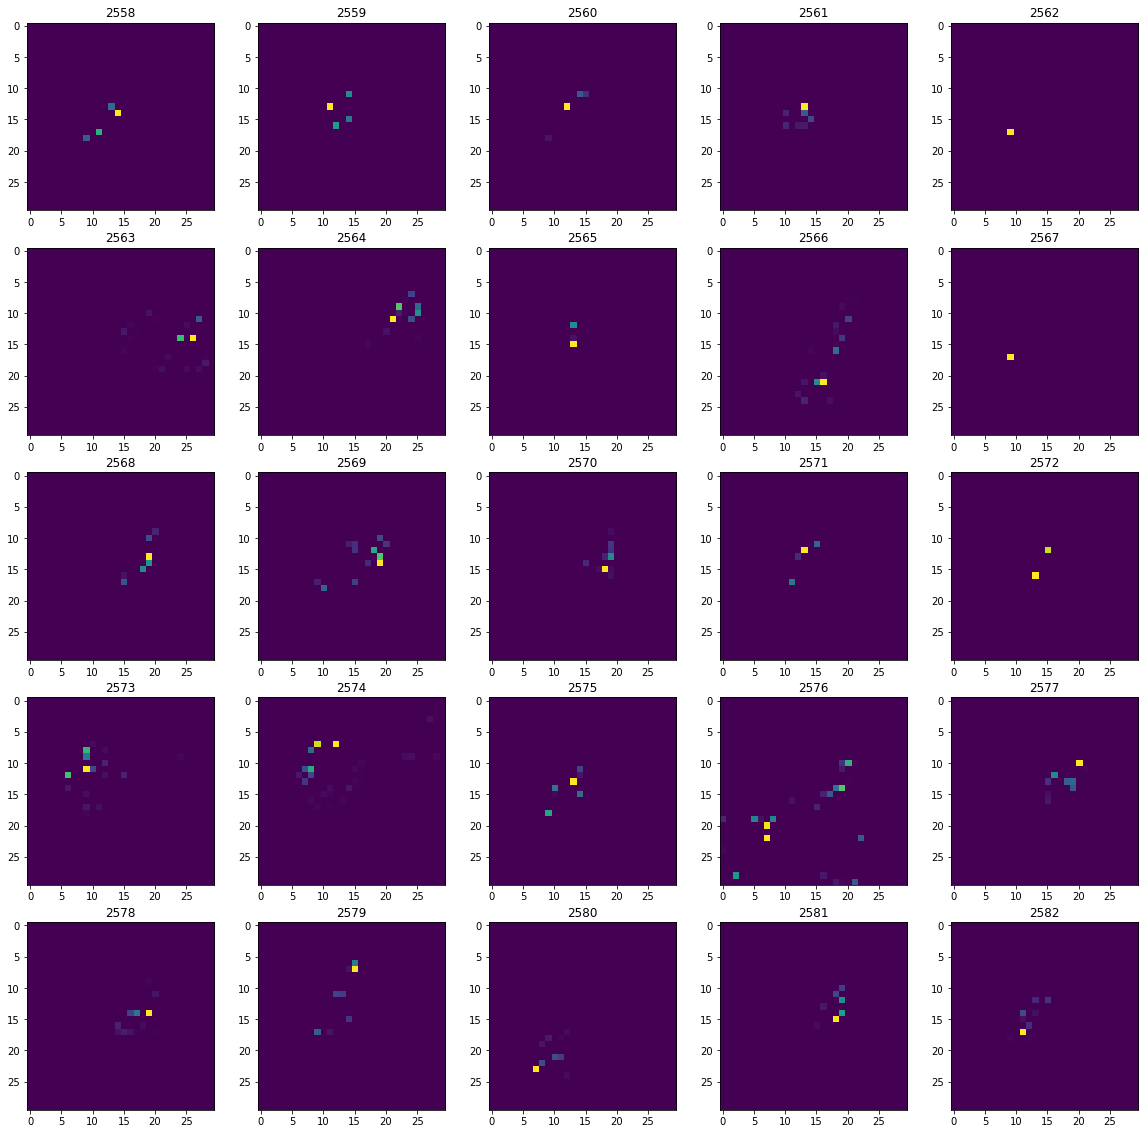

In [ ]:
import math
num = 2558
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
for row in ax:
    for col in row:
        pic_nen = np.reshape(x_test[num], (1, 30, 30, 1))
        pic_predi = a.make(pic_nen)
        pic_pred_shows = np.reshape(pic_predi, (30, 30))
        col.imshow(pic_pred_shows)
        col.set_title(num)
        num=num+1

  
  
print(np.amax(x_test_pic))
print(np.amin(x_test_pic))
print(pic_pred_show.shape)
print(y_test_pic[num].shape)
print ( "snr", 10*math.log10( abs(np.mean(y_test_pic[num])) / (np.square(np.sum(((x_test_pic[num] - pic_pred_show) - y_test_pic[num] )**2)/899) ) ) )
print ( "snr", 10*math.log10( abs(np.mean(y_test_pic[num])) / (np.square(np.sum((x_test_pic[num] - y_test_pic[num] )**2)/899) ) ) )
#10*math.log10

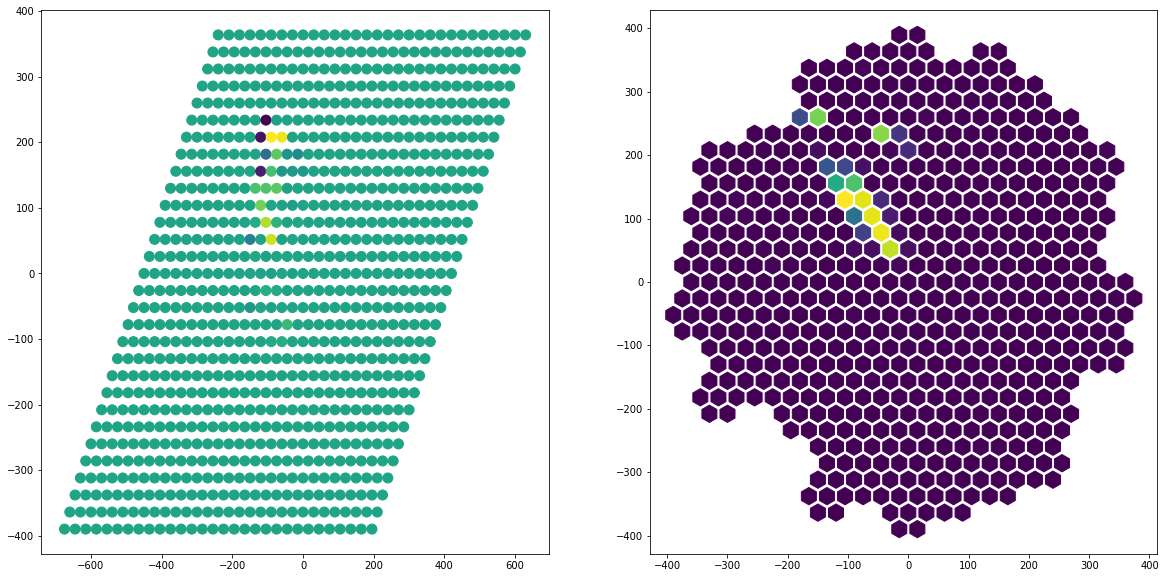

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols = 2)
ax1.scatter (x_axis_1, y_axis_1, c = x_t_rect[num], s = 100, marker = 'o')
ax2.scatter (x_axis_b, y_axis_b, c = back_to_hex(pic_pred_show), s = 300, marker = 'h')
plt.show()

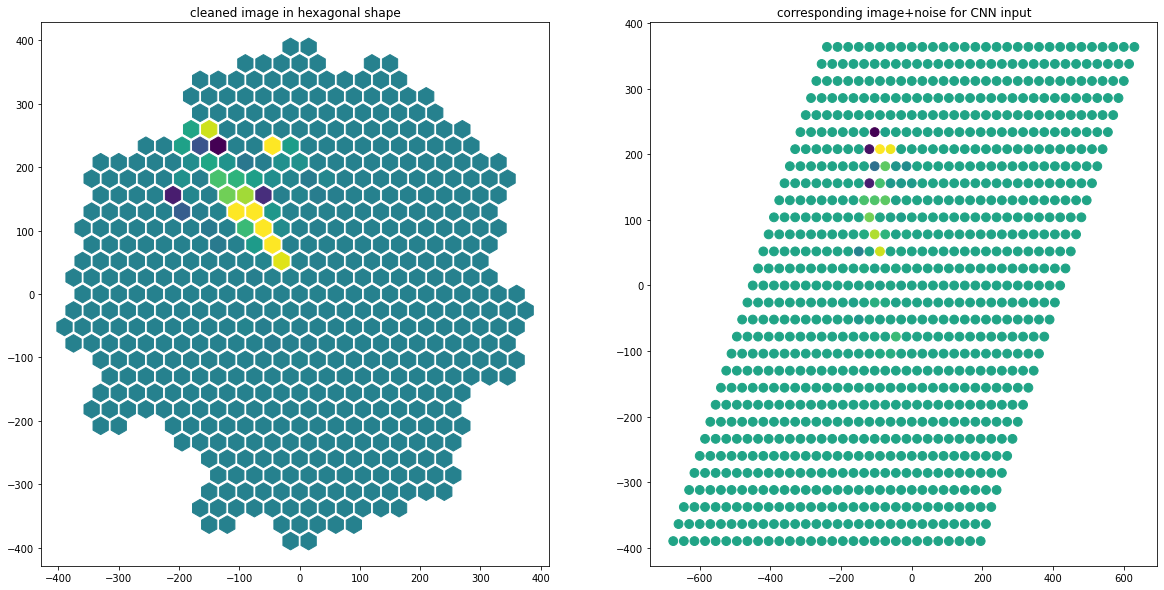

In [ ]:
rez_2 = [None]*560
rez_2 = back_to_hex(pic_pred_show)
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols = 2)

ax1.scatter (x_axis_b, y_axis_b, c = x_t_sort[425], s = 310, marker = "h")
ax1.set_title('cleaned image in hexagonal shape')
ax2.scatter(x_axis_1, y_axis_1, c=x_t_rect[num], s = 310, marker = ".")
ax2.set_title('corresponding image+noise for CNN input')
plt.show()